# Modeling and Simulation in Python

Chapter 20

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [5]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Exercises

**Exercise:** Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Use `run_ode_solver` to answer this question.

Here are some suggestions about how to proceed:

1.  Look up the Law of Universal Gravitation and any constants you need.  I suggest you work entirely in SI units: meters, kilograms, and Newtons.

2.  When the distance between the Earth and the Sun gets small, this system behaves badly, so you should use an event function to stop when the surface of Earth reaches the surface of the Sun.

3. Express your answer in days, and plot the results as millions of kilometers versus days.

If you read the reply by Dave Rothstein, you will see other ways to solve the problem, and a good discussion of the modeling decisions behind them.

You might also be interested to know that [it's actually not that easy to get to the Sun](https://www.theatlantic.com/science/archive/2018/08/parker-solar-probe-launch-nasa/567197/).

In [6]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
N = UNITS.newton;

In [7]:

G=6.67408e-11 * N / kg ** 2 * m ** 2
E_mass = 5.972e24 * kg
S_mass = 1.989e30 * kg

init_vx = 30330 * m/s
init_vy = 0 * m/s
init_x = 0 * m
init_y = 149.6e9 * m
init_state = State(position_x = init_x, position_y = init_y, velocity_x = init_vx, velocity_y = init_vy)

# init_v = Vector(0 * m/s, 0 * m/s)
# init_p = Vector(0 * m, 149.6e9 * m)

# init_state = State(init_p = init_p, init_v = init_v)


t_0 = 0*s
# t_end = 1e10*s
t_end = 34e6

system = System(init = init_state,
                G = G,
                mE = E_mass, 
                mS = S_mass, 
                r_final = 701879000*m,
                t_0 = t_0, 
                t_end = t_end)


,values
init,position_x 0 meter position_...
G,6.67408e-11 meter ** 2 * newton / kilogram ** 2
mE,5.972e+24 kilogram
mS,1.989e+30 kilogram
r_final,701879000 meter
t_0,0 second
t_end,3.4e+07


In [8]:
# def gravity_function(state, system):
#     """Computes Gravitational Force"""
#     unpack(system)
#     px, py, vx, vy = state
    
#     position = Vector(px,py)
    
#     F_magnitude = ((G*mE*mS)/(position.mag**2))/mE
    

#     position_angle = position.angle
    
#     Fx, Fy = pol2cart(position_angle, F_magnitude)
    
#     F  = Vector(Fx*(-1), Fy*(-1))
    
# #     d_hat = position.hat 
    
# #     F = d_hat * F_magnitude
    
    

#     return F



"""Supposedly this is how you're supposed to do it..."""
def gravity_function(position, system):
    """Computes Gravitational Force"""
    unpack(system)
    
    F_magnitude = ((G*mE*mS)/(position.mag**2))/mE
    

    F_angle = position.hat()
    
    
    F  = F_angle * F_magnitude
    
    return F

"""But this actually works help"""
# def gravity_function(state, system):
#     """Computes Gravitational Force"""
#     unpack(system)
#     px, py, vx, vy = state
    
#     position = Vector(px,py)
    
#     F_magnitude = ((G*mE*mS)/(position.mag**2))/mE
    

#     position_angle = position.angle
    
#     Fx, Fy = pol2cart(position_angle, F_magnitude)
    
#     F  = Vector(Fx*(-1), Fy*(-1))
    
#     return F

'But this actually works help'

In [13]:
gravity_function(Vector(init_x,init_y), system)
# gravity_function(init_state, system)

<Quantity([0.         0.00593148], 'newton / kilogram')>

In [ ]:
def event_function(state, t, system):
    """Return the distance between the edges of the Earth and the Sun.
    """
    px, py, vx, vy = state    
    
    position = Vector(px,py)
    
    
    
    return position.mag - system.r_final

In [10]:
def slope_function(state, t, system):
    """Computes Gravitational Force"""
    
    
    unpack(system)
    px, py, vx, vy = state
    
    position = Vector(px,py)
    
    F= gravity_function(position,system)    

#     F= gravity_function(state,system)    
#     F_magnitude = F.mag
    
#     print(F_magnitude)
    
    Fx = F.x
    Fy = F.y
    
    dpxdt = vx
    
    dpydt = vy
    
    dvxdt = Fx
    
    dvydt = Fy
    
    
    return dpxdt, dpydt, dvxdt, dvydt

    

In [11]:
slope_function(init,0,system)

(<Quantity(30330.0, 'meter / second')>,
 <Quantity(0.0, 'meter / second')>,
 <Quantity(0.0, 'newton / kilogram')>,
 <Quantity(0.00593147909577054, 'newton / kilogram')>)

                position_x    position_y    velocity_x    velocity_y
0.000000e+00  0.000000e+00  1.496000e+11  30330.000000  0.000000e+00
4.662755e-08  1.414214e-03  1.496000e+11  30330.000000  2.765703e-10
5.129030e-07  1.555635e-02  1.496000e+11  30330.000000  3.042274e-09
5.175658e-06  1.569777e-01  1.496000e+11  30330.000000  3.069931e-08
5.180321e-05  1.571191e+00  1.496000e+11  30330.000000  3.072696e-07
5.180787e-04  1.571333e+01  1.496000e+11  30330.000000  3.072973e-06
5.180834e-03  1.571347e+02  1.496000e+11  30330.000000  3.073001e-05
5.180838e-02  1.571348e+03  1.496000e+11  30330.000000  3.073003e-04
5.180839e-01  1.571348e+04  1.496000e+11  30330.000000  3.073004e-03
5.180839e+00  1.571348e+05  1.496000e+11  30330.000000  3.073004e-02
5.180839e+01  1.571348e+06  1.496000e+11  30330.000002  3.073004e-01
5.180839e+02  1.571348e+07  1.496000e+11  30330.000161  3.073004e+00
5.180839e+03  1.571349e+08  1.496001e+11  30330.016139  3.073001e+01
5.180839e+04  1.571376e+09  1.4960

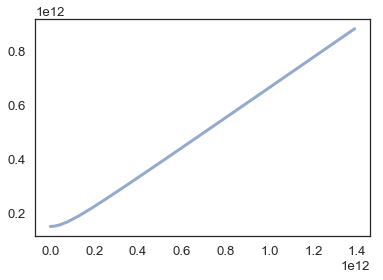

In [12]:

results, details = run_ode_solver(system, slope_function, events = event_function, method = "RK23")

# results, details = run_ode_solver(system, slope_function)
# results.index /= 60*60*24 #converts to days
print(results)
plot(results.position_x, results.position_y)
print(details)
# plot(results.velocity)

In [177]:

# results, details = run_ode_solver(system, slope_function, events = event_function)

# # results, details = run_ode_solver(system, slope_function)
# # results.index /= 60*60*24 #converts to days
# print(results)
# plot(results.position_x, results.position_y)
# print(details)
# # plot(results.velocity)